In [54]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import os
import matplotlib.pyplot as plt

In [59]:
WORKER = 0 if os.name == 'nt' else 4
PRETRAINED = 'vggface2'
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(
    image_size=224, margin=20, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=DEVICE
)

RESNET = InceptionResnetV1(pretrained=PRETRAINED).eval().to(DEVICE)


def COLLATE_FN(x):
    return x[0]

In [56]:
from google.colab import drive
drive.mount('/content/gdrive')
PATH = "/content/gdrive/MyDrive/test_images"
DATASET = datasets.ImageFolder(PATH)
DATASET.idx_to_class = {i: c for c, i in DATASET.class_to_idx.items()}


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


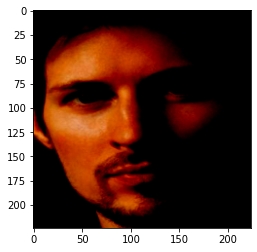

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


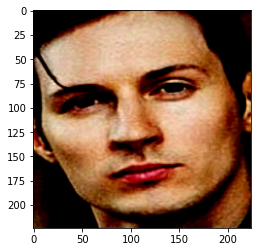

TRUE (persons on photos are the same)


In [57]:
LOADER = DataLoader(DATASET, collate_fn=COLLATE_FN, num_workers=WORKER)
aligned = []
for x, y in LOADER:
    x_aligned = mtcnn(x)
    plt.imshow(x_aligned.permute(1, 2, 0))
    plt.show()
    if x_aligned is not None:
        aligned.append(x_aligned)

def result_fun(balanced, coef):
  balanced = torch.stack(balanced).to(device)
  embeddings = resnet(balanced).detach().cpu()
  for _1 in embeddings:
      dists = [(_1 - _2).norm().item() for _2 in embeddings]
  if dists[0] < coef:
      print('TRUE (persons on photos are the same)')
  else:
      print('FALSE (persons on photos are not the same)')

result_fun(aligned,0.9)

